Explanation of notebooks: 

- The $\textbf{Exoplanet Practice notebook}$ models the transits for the planetary system, and subtracts the model from the pld data to see if histogram of noise is gaussian. This notebook finds there is lots of non-gaussian noise, indiciating a bug. 
- The $\textbf{Outliers Removal - Histogram-bug notebook}$ tries using MAST lightkurve instead of pld but still replicates this bug.
- The $\textbf{TPF files notebook}$ explains why the pld data had weird features. If I stitch lightcurves from different quarters and then flatten them, they introduce those features. If I flatten each quarter and THEN stitch, the features are no longer there. 
- The $\textbf{Outliers Removal - Histogram-pld notebook}$ goes back to using pld but fixes the bug (found to be using the wrong time array in exoplanet model). This notebook also tries to explore the pld data's weird featurues  
- The $\textbf{Outliers Removal - Histogram-sap notebook}$ tries using sap but fixes the time array bug 
- The $\textbf{Outliers Removal - Histogram notebook}$ uses MAST lightkurve and fixes the bug (found to be using the wrong time array in exoplanet model). Histogram looks good but folded light curve found to have shoulders. 

The MAST lightkurve + time array bug fix was the combination that led to the least amount of outliers. However, the folded light curve had shoulders, so flattening needs to be removed. 


In [36]:
import exoplanet as xo 
import lightkurve as lk 
import astropy.units as units
import matplotlib.pyplot as plt 
import numpy as np 
%matplotlib inline
from astropy.time import Time 
import sys 
sys.path.append("helpers")
import data 
import xo_archive
xo.utils.docs_setup()
import matplotlib
matplotlib.rcParams['font.family'] = "sans-serif"
plt.rcParams['font.family'] = 'DeJavu Serif'
import matplotlib.font_manager
from scipy.stats import norm 
import statistics

## problem: getting weird features using tpf files, not when using lightcurve files

<Axes: xlabel='Time - 2454833 [BKJD days]', ylabel='Normalized Flux'>

findfont: Font family ['cursive'] not found. Falling back to DejaVu Sans.
findfont: Generic family 'cursive' not found because none of the following families were found: Liberation Sans
findfont: Font family ['sans'] not found. Falling back to DejaVu Sans.
findfont: Generic family 'sans' not found because none of the following families were found: Liberation Sans
findfont: Font family ['sans'] not found. Falling back to DejaVu Sans.
findfont: Generic family 'sans' not found because none of the following families were found: Liberation Sans
findfont: Font family ['sans'] not found. Falling back to DejaVu Sans.
findfont: Generic family 'sans' not found because none of the following families were found: Liberation Sans


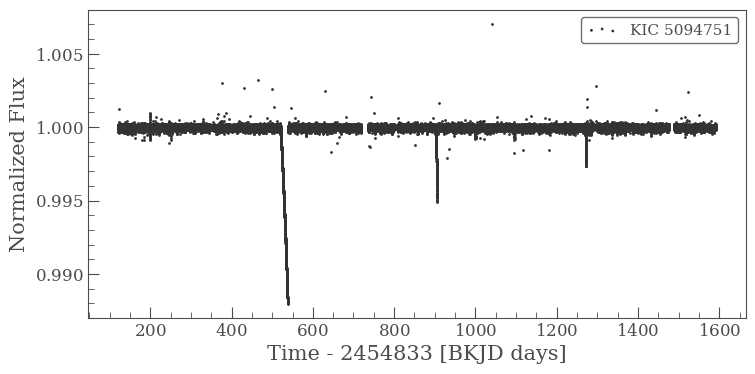

In [2]:
lc_pld = data.get_flattened_lc("Kepler-109", mission="Kepler", exptime=1800, method='pld')
lc_pld.scatter()

## using lightcurve files 

In [73]:
planet_parameters = xo_archive.get_exoplanet_parameters("Kepler-109 ", which="composite")

param_lists = xo_archive.transpose_parameters(planet_parameters)

In [74]:
search_results = lk.search_lightcurve("Kepler-109", mission="Kepler", exptime=1800)
#print(search_results)
lcc_kl = search_results.download_all()

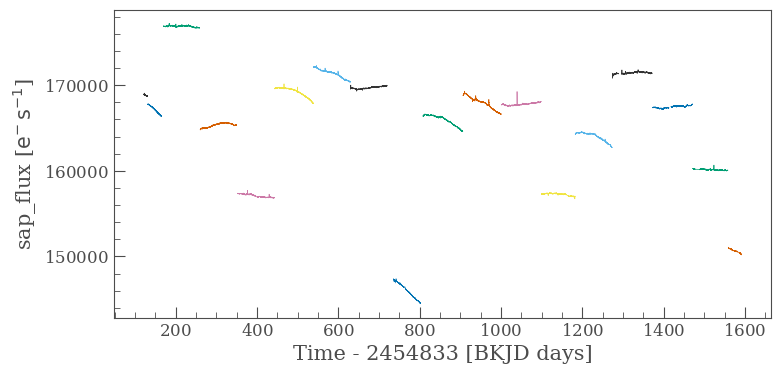

In [75]:
ax = lcc_kl[0].plot(column='sap_flux', label=None)
for lc in lcc_kl[1:]:
    lc.plot(ax=ax, column='sap_flux', label=None)


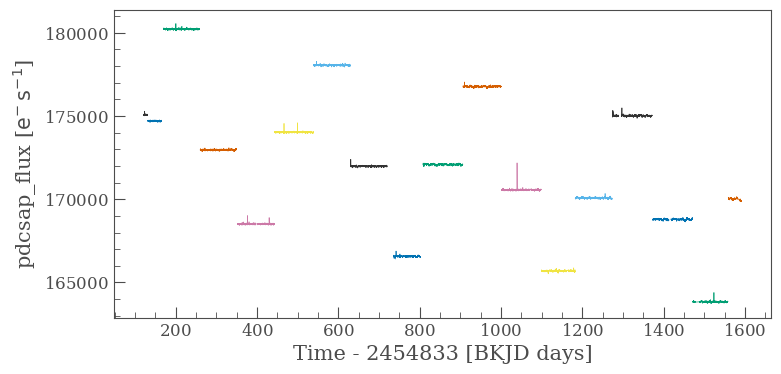

In [76]:
ax = lcc_kl[0].plot(column='pdcsap_flux', label=None)
for lc in lcc_kl[1:]:
    lc.plot(ax=ax, column='pdcsap_flux', label=None)


<Axes: xlabel='Time - 2454833 [BKJD days]', ylabel='Normalized Flux'>

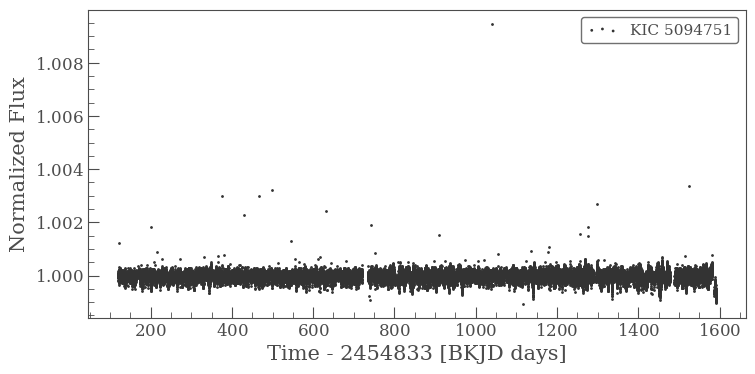

In [77]:
lcc_kl = lcc_kl.stitch()
lcc_kl.scatter()

## digging into tpf files of problem areas (~quarter #5)

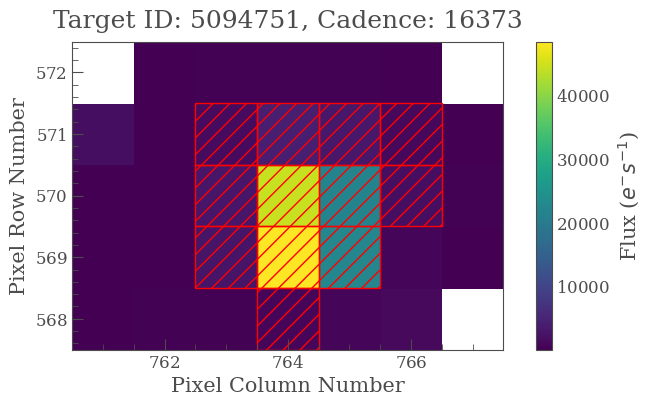

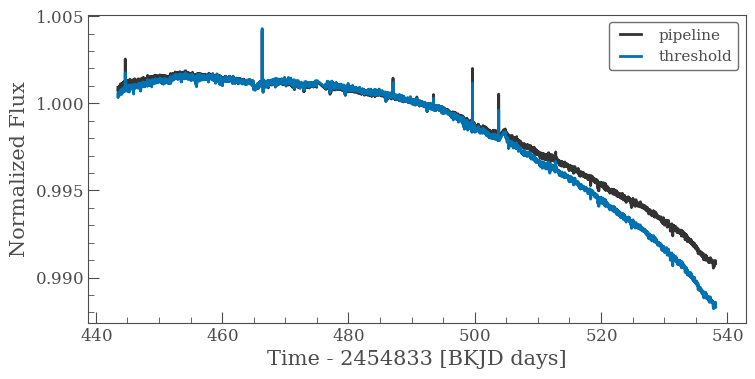

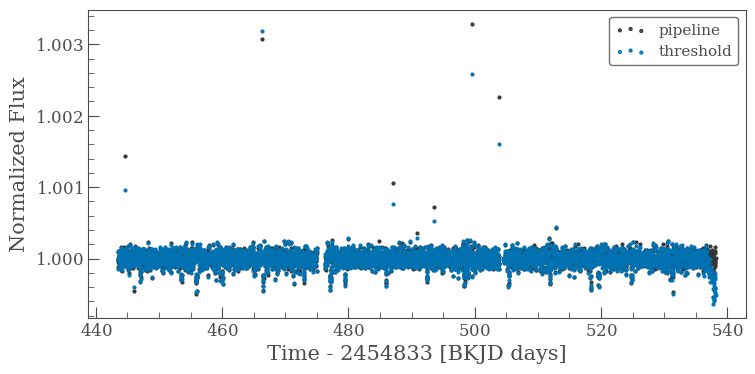

In [24]:
tpf5 = lk.search_targetpixelfile("Kepler-109", mission='Kepler', exptime=1800,quarter=5).download(quality_bitmask='default')
tpf5.plot(aperture_mask='pipeline')
ax = tpf5.to_lightcurve(aperture_mask='pipeline').normalize().plot(label='pipeline', linewidth=2);
tpf5.to_lightcurve(aperture_mask='threshold').normalize().plot(ax=ax, label='threshold', linewidth=2);
#tpf5.to_lightcurve(aperture_mask='all').normalize().plot(ax=ax, label='all', linewidth=2);

ax = tpf5.to_lightcurve(aperture_mask='pipeline').normalize().flatten().scatter(label='pipeline', linewidth=2);
tpf5.to_lightcurve(aperture_mask='threshold').normalize().flatten().scatter(ax=ax, label='threshold', linewidth=2);
#tpf5.to_lightcurve(aperture_mask='all').normalize().flatten().scatter(ax=ax, label='all', linewidth=2);

'pipeline': this is the default option, which will return the same as above.

'threshold': select all pixels which have a flux higher than 3 standard deviations above a median brightness.

'all': use every pixel in the frame for photometry.

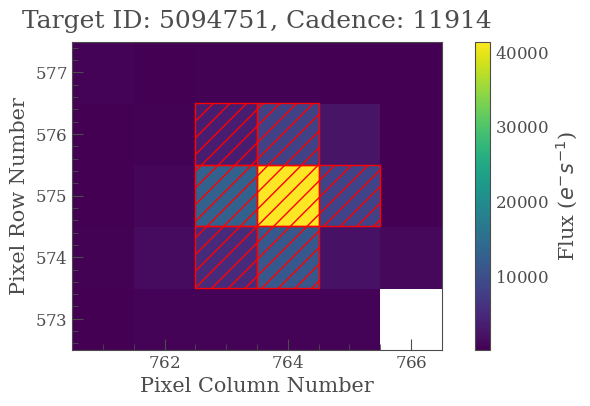

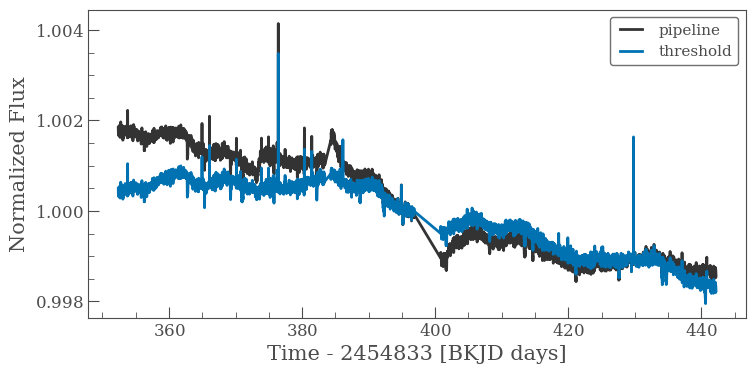

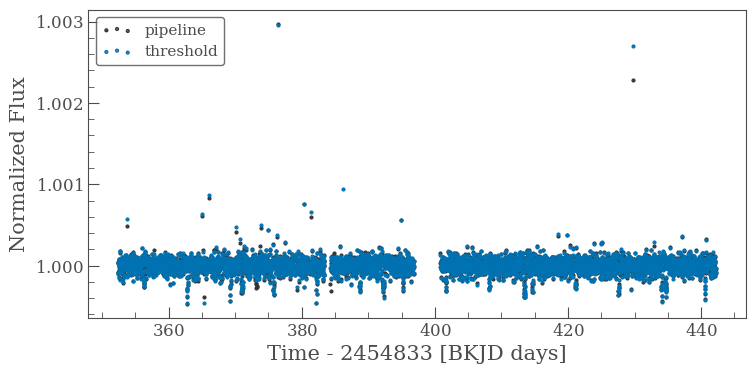

In [25]:
tpf4 = lk.search_targetpixelfile("Kepler-109", mission='Kepler', exptime=1800,quarter=4).download(quality_bitmask='default')
tpf4.plot(aperture_mask='pipeline')
ax = tpf4.to_lightcurve(aperture_mask='pipeline').normalize().plot(label='pipeline', linewidth=2);
tpf4.to_lightcurve(aperture_mask='threshold').normalize().plot(ax=ax, label='threshold', linewidth=2);
#tpf4.to_lightcurve(aperture_mask='all').normalize().plot(ax=ax, label='all', linewidth=2);

ax = tpf4.to_lightcurve(aperture_mask='pipeline').normalize().flatten().scatter(label='pipeline', linewidth=2);
tpf4.to_lightcurve(aperture_mask='threshold').normalize().flatten().scatter(ax=ax, label='threshold', linewidth=2);
#tpf4.to_lightcurve(aperture_mask='all').normalize().flatten().scatter(ax=ax, label='all', linewidth=2);

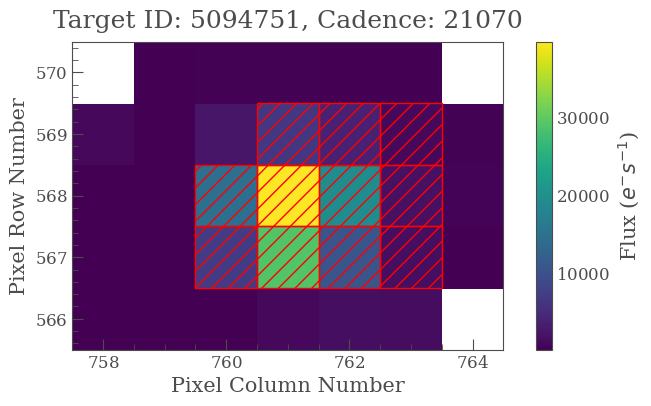

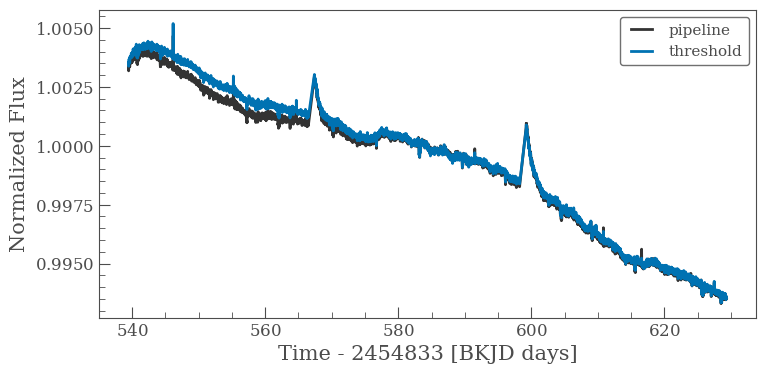

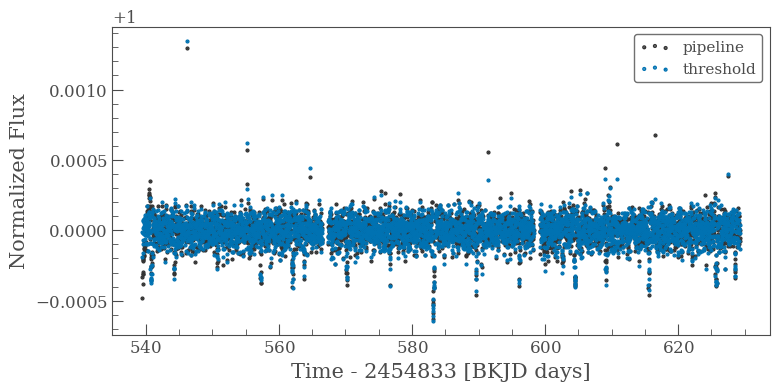

In [26]:
tpf6 = lk.search_targetpixelfile("Kepler-109", mission='Kepler', exptime=1800,quarter=6).download(quality_bitmask='default')
tpf6.plot(aperture_mask='pipeline')
ax = tpf6.to_lightcurve(aperture_mask='pipeline').normalize().plot(label='pipeline', linewidth=2);
tpf6.to_lightcurve(aperture_mask='threshold').normalize().plot(ax=ax, label='threshold', linewidth=2);
#tpf6.to_lightcurve(aperture_mask='all').normalize().plot(ax=ax, label='all', linewidth=2);

ax = tpf6.to_lightcurve(aperture_mask='pipeline').normalize().flatten().scatter(label='pipeline', linewidth=2);
tpf6.to_lightcurve(aperture_mask='threshold').normalize().flatten().scatter(ax=ax, label='threshold', linewidth=2);
#tpf6.to_lightcurve(aperture_mask='all').normalize().flatten().scatter(ax=ax, label='all', linewidth=2);

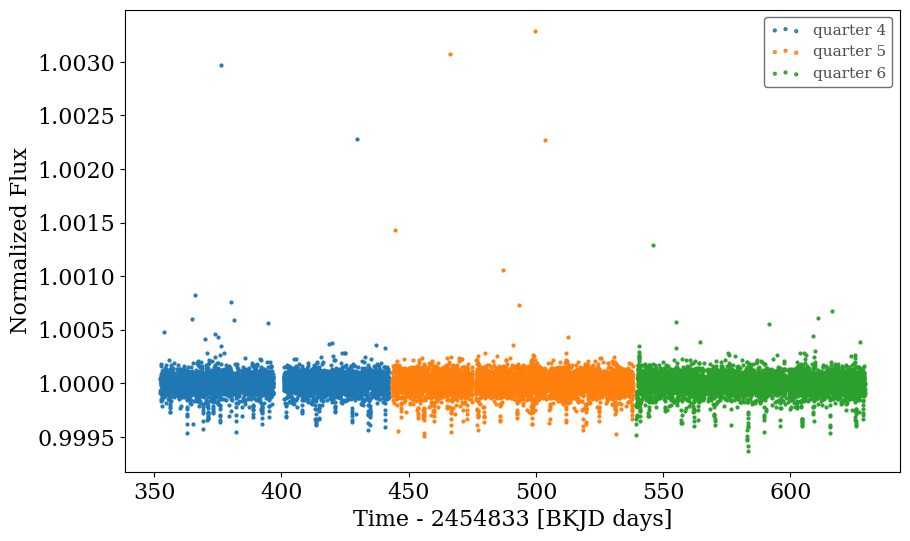

In [47]:
fig, ax = plt.subplots(figsize=(10,6))
tpf4.to_lightcurve(aperture_mask='pipeline').normalize().flatten().scatter(ax=ax, label='quarter 4', linewidth=2);
tpf5.to_lightcurve(aperture_mask='pipeline').normalize().flatten().scatter(ax=ax, label='quarter 5', linewidth=2);
tpf6.to_lightcurve(aperture_mask='pipeline').normalize().flatten().scatter(ax=ax, label='quarter 6', linewidth=2);


## the feature is not there anymore! must be my/tom's own code. something with the stitching

<Axes: xlabel='Time - 2454833 [BKJD days]', ylabel='Normalized Flux'>

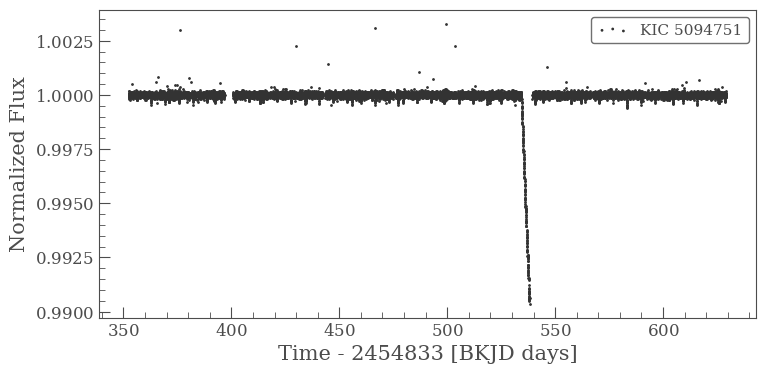

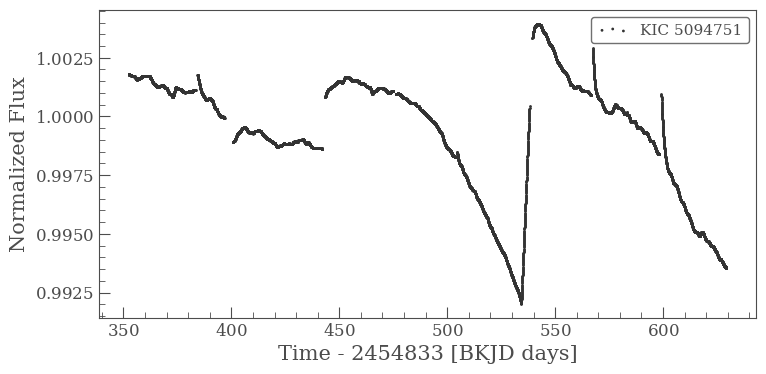

In [125]:
search_results = lk.search_targetpixelfile("Kepler-109", mission="Kepler", exptime=1800,quarter=[4,5,6])
tpfs = search_results.download_all(quality_bitmask='default')
lcs = [tpf.to_lightcurve(aperture_mask='pipeline') for tpf in tpfs]
lcc = lk.LightCurveCollection(lightcurves=lcs)
flat_lc = lcc.stitch().flatten(return_trend=True)
#flat_lc.scatter()
flat_lc[0].scatter()
flat_lc[1].scatter()

<Axes: xlabel='Time - 2454833 [BKJD days]', ylabel='Normalized Flux'>

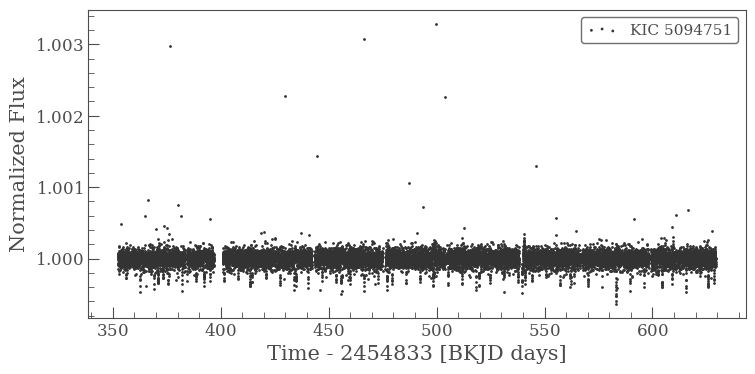

In [118]:
search_results = lk.search_targetpixelfile("Kepler-109", mission="Kepler", exptime=1800,quarter=[4,5,6])
tpfs = search_results.download_all(quality_bitmask='default')
lcs = [tpf.to_lightcurve(aperture_mask='pipeline').flatten() for tpf in tpfs]
lcc = lk.LightCurveCollection(lightcurves=lcs)
flat_lc = lcc.stitch()
flat_lc.scatter()

## found it! something about flattening each individually and then stitching. but which way is right? still can't replicate exact MAST lightcurve

In [147]:
mast_collection = lk.search_lightcurve("Kepler-109", mission="Kepler", exptime=1800).download_all(quality_bitmask='default')
mast_lc = mast_collection.stitch()
mast_lc.head()

time,flux,flux_err,quality,timecorr,centroid_col,centroid_row,cadenceno,sap_flux,sap_flux_err,sap_bkg,sap_bkg_err,pdcsap_flux,pdcsap_flux_err,sap_quality,psf_centr1,psf_centr1_err,psf_centr2,psf_centr2_err,mom_centr1,mom_centr1_err,mom_centr2,mom_centr2_err,pos_corr1,pos_corr2
,,,,d,pix,pix,,electron / s,electron / s,electron / s,electron / s,electron / s,electron / s,,pix,pix,pix,pix,pix,pix,pix,pix,pix,pix
Time,float32,float32,int32,float32,float64,float64,int32,float32,float32,float32,float32,float32,float32,int32,float64,float32,float64,float32,float64,float32,float64,float32,float32,float32
120.53925136771431,9.9985141e-01,6.3440304e-05,0,1.098948e-03,764.32649,569.54271,568,1.6894328e+05,1.1058171e+01,1.9420076e+03,5.5725414e-01,1.7505208e+05,1.1107008e+01,0,764.34960,3.4165849e-05,569.59540,4.0072926e-05,764.32649,6.8157853e-05,569.54271,6.8644622e-05,-8.0966065e-03,2.5940570e-03
120.55968591685087,1.0000284e+00,6.4543565e-05,0,1.099897e-03,764.32692,569.54238,569,1.6896584e+05,1.1058874e+01,1.9443131e+03,5.5698711e-01,1.7508306e+05,1.1300164e+01,0,764.35009,3.4136585e-05,569.59490,4.0102761e-05,764.32692,6.8158239e-05,569.54238,6.8639216e-05,-7.5982190e-03,2.1557072e-03
120.58012036610307,9.9990523e-01,6.4597538e-05,10000000000000,1.100846e-03,764.32731,569.54284,570,1.6894464e+05,1.1058278e+01,1.9400337e+03,5.5694562e-01,1.7506150e+05,1.1309614e+01,10000000000000,764.35064,3.4101711e-05,569.59538,4.0081672e-05,764.32731,6.8162808e-05,569.54284,6.8646892e-05,-7.0977863e-03,2.6257508e-03
120.6005550151167,9.9993414e-01,6.4584237e-05,0,1.101795e-03,764.32815,569.54253,571,1.6895173e+05,1.1058520e+01,1.9410404e+03,5.5729997e-01,1.7506656e+05,1.1307285e+01,0,764.35147,3.4054818e-05,569.59516,4.0101022e-05,764.32815,6.8156885e-05,569.54253,6.8645917e-05,-6.3064625e-03,2.5030053e-03
120.62098956425325,9.9993324e-01,6.4689215e-05,0,1.102744e-03,764.32890,569.54315,572,1.6894155e+05,1.1058362e+01,1.9455128e+03,5.5681151e-01,1.7506641e+05,1.1325665e+01,0,764.35230,3.4009394e-05,569.59558,4.0086921e-05,764.32890,6.8163332e-05,569.54315,6.8657289e-05,-5.5312533e-03,2.8758007e-03


In [136]:
search_results = lk.search_targetpixelfile("Kepler-109", mission="Kepler", exptime=1800)
tpfs = search_results.download_all(quality_bitmask='default')
lcs = [tpf.to_lightcurve(aperture_mask='pipeline') for tpf in tpfs]
lcc = lk.LightCurveCollection(lightcurves=lcs)
flat_lc = lcc.stitch()
flat_lc.head()

time,flux,flux_err,centroid_col,centroid_row,cadenceno,quality
,,,pix,pix,,
Time,float32,float32,float64,float64,int32,int32
120.53925136771431,1.0007073879241943,6.54255854897201e-05,764.3142306710971,569.5358540141697,568,0
120.55968591685087,1.0008409023284912,6.542982737300918e-05,764.3146842073073,569.5354736569042,569,0
120.58012036610307,1.0007153749465942,6.54262985335663e-05,764.3151723690092,569.5359155373404,570,8192
120.6005550151167,1.0007574558258057,6.54276373097673e-05,764.3159612730559,569.5357197296651,571,0
120.62098956425325,1.000697135925293,6.542683695442975e-05,764.3167219987284,569.5362472681761,572,0


In [133]:
search_results = lk.search_targetpixelfile("Kepler-109", mission="Kepler", exptime=1800)
tpfs = search_results.download_all(quality_bitmask='default')
lcs = [tpf.to_lightcurve(aperture_mask='pipeline') for tpf in tpfs]
lcc = lk.LightCurveCollection(lightcurves=lcs)
flat_lc = lcc.stitch().flatten()#.remove_outliers()
flat_lc.head()
#flat_lc.scatter()

time,flux,flux_err,centroid_col,centroid_row,cadenceno,quality
,,,pix,pix,,
Time,float64,float64,float64,float64,int32,int32
120.53925136771431,0.9999889214956934,6.537861263101373e-05,764.3142306710971,569.5358540141697,568,0
120.55968591685087,1.000124246258228,6.538297608740119e-05,764.3146842073073,569.5354736569042,569,0
120.58012036610307,1.000000714744938,6.537957438714642e-05,764.3151723690092,569.5359155373404,570,8192
120.6005550151167,1.0000445525140722,6.538102903416017e-05,764.3159612730559,569.5357197296651,571,0
120.62098956425325,0.9999861815468376,6.538035386326129e-05,764.3167219987284,569.5362472681761,572,0


## What does flattening do? 

Removes the low frequency trend using scipy’s Savitzky-Golay filter.

LightCurve.flatten(window_length=101, polyorder=2, return_trend=False, break_tolerance=5, niters=3, sigma=3, mask=None)

$\textbf{window_length}$: The length of the filter window (i.e. the number of coefficients)

$\textbf{polyorder}$: The order of the polynomial used to fit the samples

$\textbf{break_tolerance}$: If there are large gaps in time, flatten will split the flux into several sub-lightcurves and apply savgol_filter to each individually. A gap is defined as a period in time larger than break_tolerance times the median gap

$\textbf{niters}$: Number of iterations to iteratively sigma clip and flatten. If more than one, will perform the flatten several times, removing outliers each time.

$\textbf{sigma}$: Number of sigma above which to remove outliers from the flatten

## OKAY! i am able to recreate the SAP values of the MAST lightcurve (PA phase) but PDC phase 

In [167]:
mast_collection = lk.search_lightcurve("Kepler-109", mission="Kepler", exptime=1800).download_all(quality_bitmask='default')
mast_lc = mast_collection.stitch()
mast_lc.head()

time,flux,flux_err,quality,timecorr,centroid_col,centroid_row,cadenceno,sap_flux,sap_flux_err,sap_bkg,sap_bkg_err,pdcsap_flux,pdcsap_flux_err,sap_quality,psf_centr1,psf_centr1_err,psf_centr2,psf_centr2_err,mom_centr1,mom_centr1_err,mom_centr2,mom_centr2_err,pos_corr1,pos_corr2
,,,,d,pix,pix,,electron / s,electron / s,electron / s,electron / s,electron / s,electron / s,,pix,pix,pix,pix,pix,pix,pix,pix,pix,pix
Time,float32,float32,int32,float32,float64,float64,int32,float32,float32,float32,float32,float32,float32,int32,float64,float32,float64,float32,float64,float32,float64,float32,float32,float32
120.53925136771431,9.9985141e-01,6.3440304e-05,0,1.098948e-03,764.32649,569.54271,568,1.6894328e+05,1.1058171e+01,1.9420076e+03,5.5725414e-01,1.7505208e+05,1.1107008e+01,0,764.34960,3.4165849e-05,569.59540,4.0072926e-05,764.32649,6.8157853e-05,569.54271,6.8644622e-05,-8.0966065e-03,2.5940570e-03
120.55968591685087,1.0000284e+00,6.4543565e-05,0,1.099897e-03,764.32692,569.54238,569,1.6896584e+05,1.1058874e+01,1.9443131e+03,5.5698711e-01,1.7508306e+05,1.1300164e+01,0,764.35009,3.4136585e-05,569.59490,4.0102761e-05,764.32692,6.8158239e-05,569.54238,6.8639216e-05,-7.5982190e-03,2.1557072e-03
120.58012036610307,9.9990523e-01,6.4597538e-05,10000000000000,1.100846e-03,764.32731,569.54284,570,1.6894464e+05,1.1058278e+01,1.9400337e+03,5.5694562e-01,1.7506150e+05,1.1309614e+01,10000000000000,764.35064,3.4101711e-05,569.59538,4.0081672e-05,764.32731,6.8162808e-05,569.54284,6.8646892e-05,-7.0977863e-03,2.6257508e-03
120.6005550151167,9.9993414e-01,6.4584237e-05,0,1.101795e-03,764.32815,569.54253,571,1.6895173e+05,1.1058520e+01,1.9410404e+03,5.5729997e-01,1.7506656e+05,1.1307285e+01,0,764.35147,3.4054818e-05,569.59516,4.0101022e-05,764.32815,6.8156885e-05,569.54253,6.8645917e-05,-6.3064625e-03,2.5030053e-03
120.62098956425325,9.9993324e-01,6.4689215e-05,0,1.102744e-03,764.32890,569.54315,572,1.6894155e+05,1.1058362e+01,1.9455128e+03,5.5681151e-01,1.7506641e+05,1.1325665e+01,0,764.35230,3.4009394e-05,569.59558,4.0086921e-05,764.32890,6.8163332e-05,569.54315,6.8657289e-05,-5.5312533e-03,2.8758007e-03


In [190]:
search_results = lk.search_targetpixelfile("Kepler-109", mission="Kepler", exptime=1800)
tpfs = search_results.download_all(quality_bitmask='default')
lcs = [tpf.to_lightcurve(method='sap',aperture_mask='pipeline') for tpf in tpfs]
lcs = lk.LightCurveCollection(lightcurves=lcs)

# keep unstitched because can avoid normalization

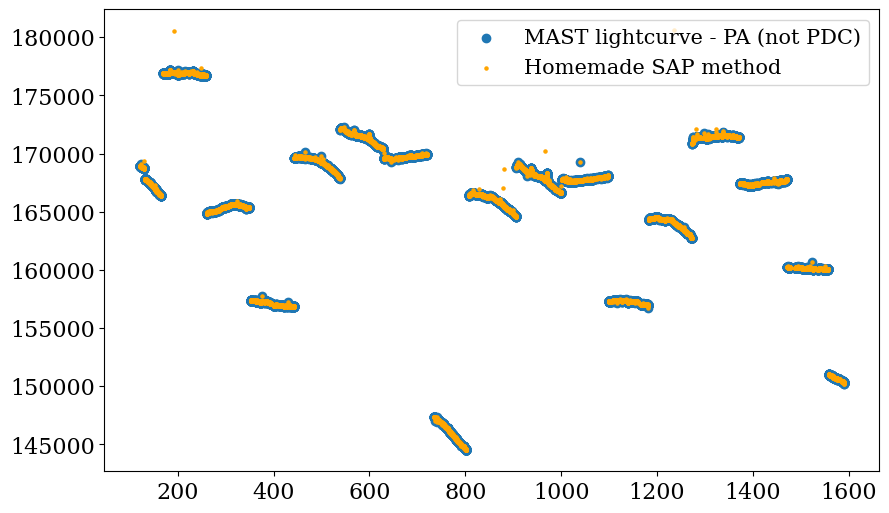

In [196]:
fig, ax = plt.subplots(figsize=(10,6))
plt.scatter(mast_lc['time'].value,mast_lc['sap_flux'],label='MAST lightcurve - PA (not PDC)')
for i in lcs:
    plt.scatter(i['time'].value,i['flux'],color='orange',s=5)
plt.scatter(i[0]['time'].value,i[0]['flux'],color='orange',s=5,label='Homemade SAP method')
plt.legend(fontsize=15)